In [1]:
import math
import numpy as np
from copy import deepcopy
from random import randint

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs

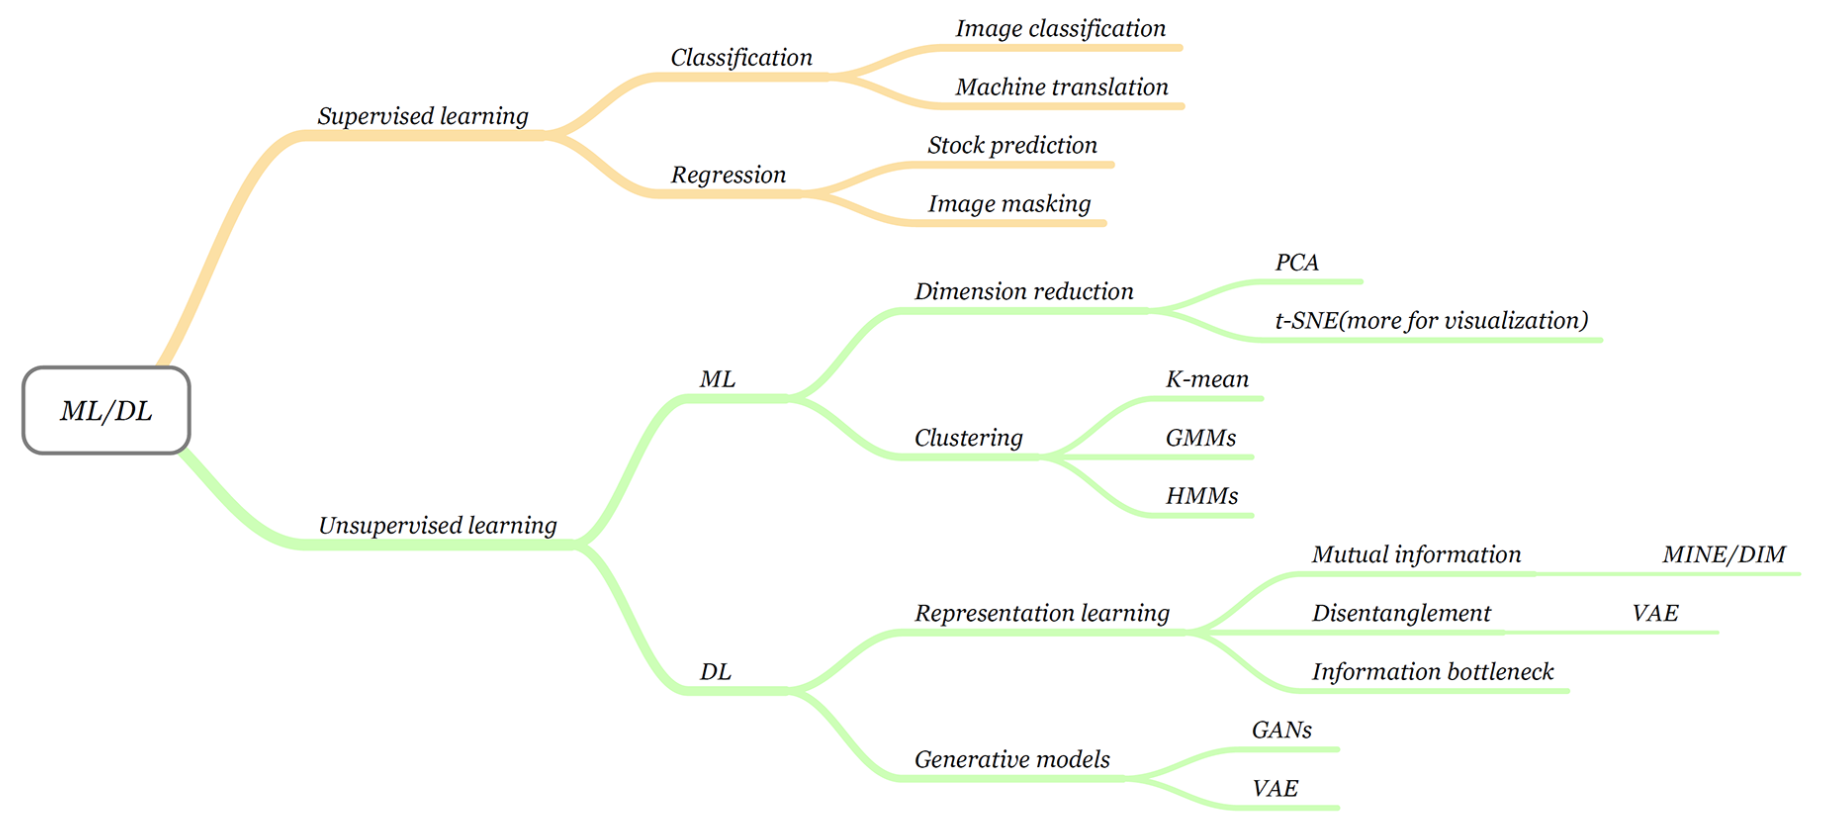

In [2]:
from IPython.display import Image
Image("(un)supervised.png",width=1000)

In [7]:
from sklearn.datasets import make_blobs
groups = 4

# Generate random blob data with 5000 samples,  4 centers and 2 features
X, _ = make_blobs(n_samples = 5000, centers = 4, n_features = 2,
random_state = 42)


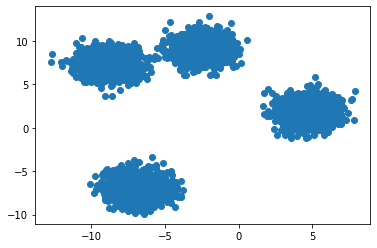

In [8]:
# visualize the dataset
plt.scatter(X[:, 0], X[:, 1])

In [39]:
# Create a function to generate N random centers
def generate_random_centers(x, k):
    n_features = x.shape[1]
    result = np.zeros((k, 2))
    
    for i in range (k):
        number1 = np.random.randint(np.min(X[:, 0])*0.2, np.max(X[:, 0])*0.8)
        number2 = np.random.randint(np.min(X[:, 1])*0.2, np.max(X[:, 1])*0.8)
        
        result[i, 0] = number1
        result[i, 1] = number2
    return result
    
c_positions = generate_random_centers(X, groups)
print(c_positions)

[[ 1.  5.]
 [ 5.  6.]
 [-2.  7.]
 [ 1.  4.]]


-1
8


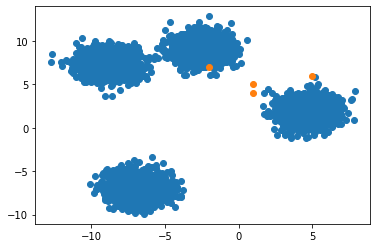

In [42]:
# Visualize the random centers
print(np.random.randint(np.min(X[:, 0]), np.max(X[:, 0])))
print(np.random.randint(np.min(X[:, 1]), np.max(X[:, 1])))

# plt.scatter(c_positions, c_positions.T)
# plt.show()
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(c_positions[:, 0], c_positions[:, 1])
plt.show()

In [54]:
# Helper functions to calculate the distance between a point and a center
def dist(a,b):
    com = a-b
    sum = 0
    for c in com:
        sum += c**2
    return math.sqrt(sum)
    
def dist_2d(a,b):
    squared_distance = 0
    for i in range(len(a)):
        squared_distance += (a[i][0] - b[i][0])**2 + (a[i][1] - b[i][1])**2
    dist = math.sqrt(squared_distance)
    return dist

In [65]:
def kmeans(x, number_of_clusters, threshold = 0.000001):
    ...
    # Generate random centers
    centers = generate_random_centers(x, number_of_clusters)
    # craete numpy zeros to store the clusters id of each element
    clusters = np.zeros(len(x))
    # create numpy zeros to store the previous centers
    old_centers = np.zeros(centers.shape)
    allcenters = np.zeros(centers.shape)
    #set error to 1
    error = 1

    # Iterate until error is less than threshold
    # assign each element to the closest center
    while error > threshold:
        # Iterate through each element
        for n,i in enumerate(x):
            templist = []
            for j in centers:
                # calculate the distance between the element and each center
                templist.append(dist(i, j))
            # select the nearest center
            # assign the element to the cluster
            clusters[n] = np.min(templist)          
        print(clusters)
 
        # save the centers as old centers
        old_centers = deepcopy(centers)
        centers = np.zeros(centers.shape)

        # calculate the new centers by taking the average of each cluster

        # Iterate through each cluster
        for j in range(0, number_of_clusters):
            points = []
            # select the elements belonging to the cluster
            for n in range(len(x)):
                if clusters[n] == j:
                    points.append(x[n])

            # calculate the mean of the cluster
            centers[j] = np.mean(points, axis=0)
        
        # calculate the distance between the new and old centers
        error = dist_2d(centers, old_centers)
    #return the centers and the clusters
    return centers, clusters

[ 2.84193909 11.48144845  2.61650309 ...  2.89098721  6.74903878
  1.93718426]


C:\Users\hallgato\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\hallgato\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


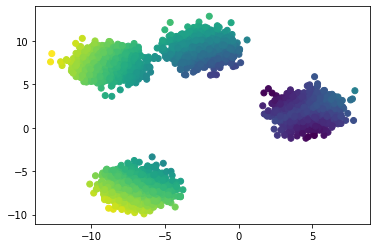

In [66]:
# Run the K-means algorithm with 4 clusters and visualize the results
centers, p = kmeans(X,  4, threshold=0.000001)
plt.scatter(X[:, 0], X[:, 1], c = p)
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='r')
plt.show()

In [67]:
# Run the K-means algorithm with 2,3  clusters and visualize the results
asd = kmeans(X, 4)

[ 2.96020219 12.13671125  3.08899435 ...  3.79349566  5.00447745
  3.80324233]


[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[ 2.96020219 12.13671125  3.08899435 ...  3.79349566  5.00447745
  3.80324233]


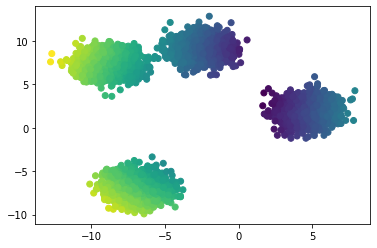

In [68]:
print(asd[0])
print(asd[1])
plt.scatter(X[:, 0], X[:, 1], c = asd[1])
plt.scatter(asd[0][:, 0], asd[0][:, 1], s = 300, c='r')